In [34]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
from shapely.wkt import loads

In [35]:
data = pd.read_csv('Data/AdvGIS_data.csv')

In [36]:
# geo_data = gp.read_file('Data/AdvGIS_data.csv')

In [37]:
data_no_categories = data.copy()


In [38]:
data.columns

Index(['store_number', 'address', 'city', 'zip_code', 'store_location',
       'county_number', 'county', 'category', 'category_name', 'month', 'year',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'Sales_USD'],
      dtype='object')

In [39]:
group_cols = ['store_number', 'address', 'city', 'zip_code', 'store_location', 'county_number', 'county', 'month', 'year']
agg_funcs = {'state_bottle_cost': 'mean', 'state_bottle_retail': 'mean', 'bottles_sold': 'mean', 
             'sale_dollars': 'sum', 'volume_sold_liters': 'sum', 'Sales_USD': 'sum'}

data_no_categories = data_no_categories.groupby(group_cols).agg(agg_funcs).reset_index()
data_no_categories

,store_number,address,city,zip_code,store_location,county_number,county,month,year,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,Sales_USD
0,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT(-92.455796 42.517182),7,BLACK HAWK,1,2017,17.018560,25.529839,165.631579,94039.25,5980.55,102761.941673
1,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT(-92.455796 42.517182),7,BLACK HAWK,1,2018,11.864432,17.798604,202.235294,94562.40,6546.60,98576.206593
2,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT(-92.455796 42.517182),7,BLACK HAWK,1,2019,12.846846,19.271916,205.742857,107404.29,6772.29,113954.509935
3,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT(-92.455796 42.517182),7,BLACK HAWK,1,2020,13.310105,19.967139,197.771429,98774.50,6288.57,102767.589962
4,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT(-92.455796 42.517182),7,BLACK HAWK,1,2021,13.958634,20.939481,123.736842,73416.39,4486.25,77210.690354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95013,9934,4860 HEATHERSTONE RD.,BETTENDORF,52722,POINT(-90.455001 41.571059),82,SCOTT,1,2018,19.250000,28.880000,1.000000,346.56,0.75,28.880000
95014,9934,4860 HEATHERSTONE RD.,BETTENDORF,52722,POINT(-90.455001 41.571059),82,SCOTT,11,2017,19.250000,28.880000,1.000000,346.56,0.75,28.880000
95015,9937,3345 270TH AVE.,KEOKUK,52632,POINT(-91.399797 40.473242),56,LEE,5,2018,17.500000,26.250000,2.000000,157.50,1.50,52.500000
95016,9938,209 E 3RD ST,TEMPLETON,51463,POINT(-94.936366 41.917072),14,CARROLL,7,2018,27.410000,41.120000,49.000000,246.72,36.75,2014.880000


In [40]:
data_no_categories.county.value_counts()

POLK          12474
LINN           6820
SCOTT          4528
BLACK HAWK     4499
JOHNSON        4037
              ...  
VAN BUREN       135
LUCAS           133
FREMONT         131
DAVIS            91
ADAMS            60
Name: county, Length: 99, dtype: int64

In [41]:
def transform_number(num):
    # Pad the input number with zeroes on the left to make it three digits
    num_str = str(num).zfill(3)
    
    if num == 1:
        return "19" + "001"
    elif num == 2:
        return "19" + "003"
    elif num == 3:
        return "19" + "005"
    elif num == 4:
        return "19" + "007"
    elif num == 5:
        return "19" + "009"
    else:
        transformed_value = (num - 4) * 2 + 7
        return "19" + str(transformed_value).zfill(3)


In [42]:
data_no_categories.county_number = data_no_categories.county_number.apply(lambda x : transform_number(x))

In [43]:
data_no_categories.store_location = data_no_categories.store_location.apply(lambda x : loads(x))

In [44]:
geo_data_nocat = gp.GeoDataFrame(data_no_categories, geometry='store_location')
geo_data_nocat = geo_data_nocat[~(geo_data_nocat.store_location.apply(lambda x : x.x) <= -99)]  # remove those below -99
geo_data_nocat = geo_data_nocat[~(geo_data_nocat.store_location.apply(lambda x : x.x) >= -87)] # remove those above -87
geo_data_nocat = geo_data_nocat[~(geo_data_nocat.store_location.apply(lambda x : x.y) >= 44.5)] # remove those above 44.5
geo_data_nocat = geo_data_nocat[~(geo_data_nocat.store_location.apply(lambda x : x.y) <= 39)] # remove those below 39

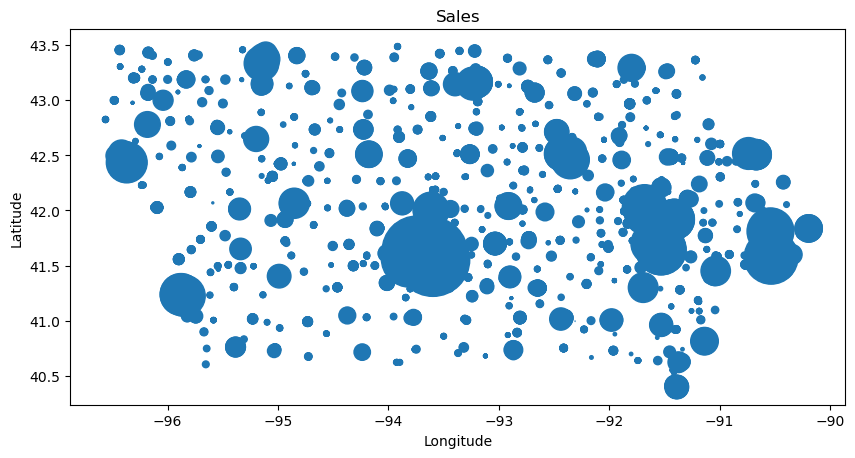

In [45]:
# Plot the data using the `scatter()` method and the `SALES` column for the color
ax = geo_data_nocat.plot(markersize=geo_data_nocat.Sales_USD / 500, figsize=(10, 10))

# Set the title and axis labels for the plot
ax.set_title('Sales')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [46]:
alcohol_data_nocat = geo_data_nocat.copy()
alcohol_data_nocat['longitude'] =  geo_data_nocat.store_location.apply(lambda x : x.x)
alcohol_data_nocat['latitude'] = geo_data_nocat.store_location.apply(lambda x : x.y)
alcohol_data_nocat.drop(columns=['store_location'], inplace=True)


In [47]:
alcohol_data_nocat.head(4)

,store_number,address,city,zip_code,county_number,county,month,year,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,Sales_USD,longitude,latitude
0,2106,2217 COLLEGE,CEDAR FALLS,50613,19013,BLACK HAWK,1,2017,17.018560,25.529839,165.631579,94039.25,5980.55,102761.941673,-92.455796,42.517182
1,2106,2217 COLLEGE,CEDAR FALLS,50613,19013,BLACK HAWK,1,2018,11.864432,17.798604,202.235294,94562.40,6546.60,98576.206593,-92.455796,42.517182
2,2106,2217 COLLEGE,CEDAR FALLS,50613,19013,BLACK HAWK,1,2019,12.846846,19.271916,205.742857,107404.29,6772.29,113954.509935,-92.455796,42.517182
3,2106,2217 COLLEGE,CEDAR FALLS,50613,19013,BLACK HAWK,1,2020,13.310105,19.967139,197.771429,98774.50,6288.57,102767.589962,-92.455796,42.517182


In [48]:
import datetime
alcohol_data_nocat['date'] = alcohol_data_nocat.apply(lambda x : datetime.datetime(int(x.year), int(x.month), 1), axis = 1)

In [49]:
alcohol_data_nocat.store_number.value_counts().count()

2245

In [50]:
alcohol_data_nocat.year.value_counts()

2021    18809
2020    17906
2019    16600
2018    15725
2017    14713
2022    11170
Name: year, dtype: int64

In [51]:
alcohol_data_nocat.sort_values(by = ['store_number', 'date'])

,store_number,address,city,zip_code,county_number,county,month,year,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,Sales_USD,longitude,latitude,date
0,2106,2217 COLLEGE,CEDAR FALLS,50613,19013,BLACK HAWK,1,2017,17.018560,25.529839,165.631579,94039.25,5980.55,102761.941673,-92.455796,42.517182,2017-01-01
6,2106,2217 COLLEGE,CEDAR FALLS,50613,19013,BLACK HAWK,2,2017,13.340252,20.012369,183.424242,82994.27,5737.12,88788.928557,-92.455796,42.517182,2017-02-01
12,2106,2217 COLLEGE,CEDAR FALLS,50613,19013,BLACK HAWK,3,2017,12.135589,18.205629,249.911765,113260.37,8104.75,119460.953773,-92.455796,42.517182,2017-03-01
18,2106,2217 COLLEGE,CEDAR FALLS,50613,19013,BLACK HAWK,4,2017,13.541719,20.314593,198.486486,96115.94,6885.64,102195.245969,-92.455796,42.517182,2017-04-01
24,2106,2217 COLLEGE,CEDAR FALLS,50613,19013,BLACK HAWK,5,2017,12.340159,18.512463,208.527778,106593.17,7023.15,114409.215580,-92.455796,42.517182,2017-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95014,9934,4860 HEATHERSTONE RD.,BETTENDORF,52722,19163,SCOTT,11,2017,19.250000,28.880000,1.000000,346.56,0.75,28.880000,-90.455001,41.571059,2017-11-01
95013,9934,4860 HEATHERSTONE RD.,BETTENDORF,52722,19163,SCOTT,1,2018,19.250000,28.880000,1.000000,346.56,0.75,28.880000,-90.455001,41.571059,2018-01-01
95015,9937,3345 270TH AVE.,KEOKUK,52632,19111,LEE,5,2018,17.500000,26.250000,2.000000,157.50,1.50,52.500000,-91.399797,40.473242,2018-05-01
95016,9938,209 E 3RD ST,TEMPLETON,51463,19027,CARROLL,7,2018,27.410000,41.120000,49.000000,246.72,36.75,2014.880000,-94.936366,41.917072,2018-07-01


In [52]:
# Export to csv
alcohol_data_nocat.to_csv('alcohol_data_nocat.csv')

### Regreso a geo data con categories ...

In [53]:
data.store_location = data.store_location.apply(lambda x : loads(x))

In [54]:
geo_data = gp.GeoDataFrame(data, geometry='store_location')

<AxesSubplot: >

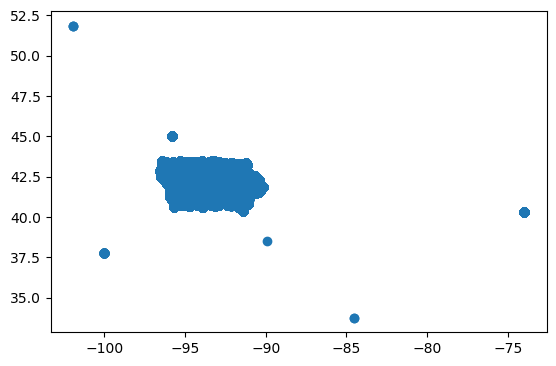

In [148]:
geo_data.plot()

<AxesSubplot: >

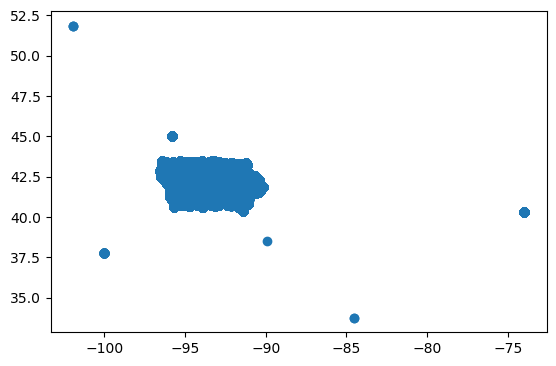

In [149]:
geo_data.plot()

# We may have some wrong data

In [55]:
geo_data.year.value_counts().sort_index()

2017    295123
2018    312936
2019    326531
2020    361127
2021    371176
2022    212454
Name: year, dtype: int64

In [56]:
geo_data.columns

Index(['store_number', 'address', 'city', 'zip_code', 'store_location',
       'county_number', 'county', 'category', 'category_name', 'month', 'year',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'Sales_USD'],
      dtype='object')

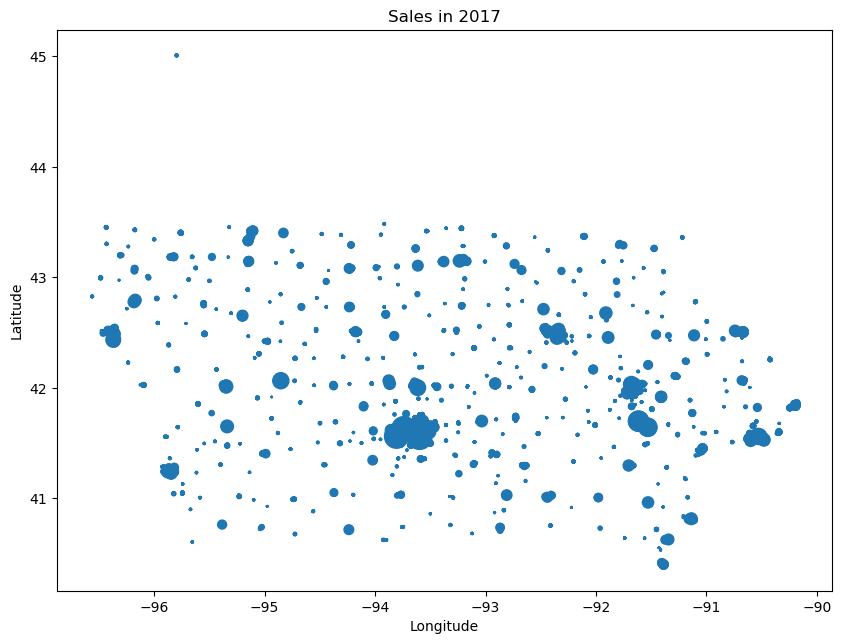

In [57]:
# Plot the data using the `scatter()` method and the `SALES` column for the color
ax = geo_data.query('year == 2017').plot(markersize=geo_data.query('year == 2017').Sales_USD / 500, figsize=(10, 10))

# Set the title and axis labels for the plot
ax.set_title('Sales in 2017')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [58]:
geo_data

,store_number,address,city,zip_code,store_location,county_number,county,category,category_name,month,year,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,Sales_USD
0,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2017,6.855000,10.283333,252,2128.32,240.00,2591.400000
1,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2018,6.896154,10.345385,270,2402.10,268.50,2793.253846
2,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2019,6.199000,9.299000,240,2102.28,240.00,2231.760000
3,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2020,8.536667,12.806111,301,3321.63,240.75,3854.639444
4,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2021,11.257333,16.886667,168,2524.80,147.60,2836.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879342,9934,4860 HEATHERSTONE RD.,BETTENDORF,52722,POINT (-90.45500 41.57106),82,SCOTT,1011700,CORN WHISKIES,11,2017,19.250000,28.880000,1,346.56,0.75,28.880000
1879343,9937,3345 270TH AVE.,KEOKUK,52632,POINT (-91.39980 40.47324),56,LEE,1011700,CORN WHISKIES,5,2018,17.500000,26.250000,2,157.50,1.50,52.500000
1879344,9938,209 E 3RD ST,TEMPLETON,51463,POINT (-94.93637 41.91707),14,CARROLL,1011100,BLENDED WHISKIES,7,2018,27.410000,41.120000,49,246.72,36.75,2014.880000
1879345,9946,3294 170TH ST,ROCK RAPIDS,51246,POINT (-96.13860 43.40428),60,LYON,1700000,TEMPORARY & SPECIALTY PACKAGES,10,2020,15.000000,22.500000,120,2700.00,45.00,2700.000000


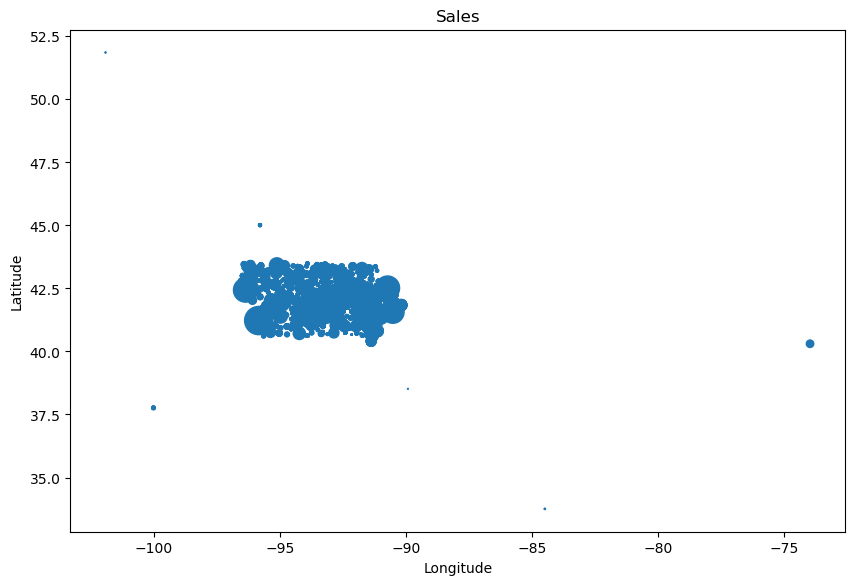

In [12]:
# Plot the data using the `scatter()` method and the `SALES` column for the color
ax = geo_data.plot(markersize=geo_data.Sales_USD / 500, figsize=(10, 10))

# Set the title and axis labels for the plot
ax.set_title('Sales')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [59]:
# A ojo, hay observaciones que se salen del estado de IOWA
# Latitudes debajo de 39, arriba de 44
# Longitudes debajo de -99 y por encima de -87

data.store_location.iloc[0].x, data.store_location.iloc[0].y
geo_data = geo_data[~(geo_data.store_location.apply(lambda x : x.x) <= -99)]  # remove those below -99
geo_data = geo_data[~(geo_data.store_location.apply(lambda x : x.x) >= -87)] # remove those above -87
geo_data = geo_data[~(geo_data.store_location.apply(lambda x : x.y) >= 44.5)] # remove those above 44.5
geo_data = geo_data[~(geo_data.store_location.apply(lambda x : x.y) <= 39)] # remove those below 39


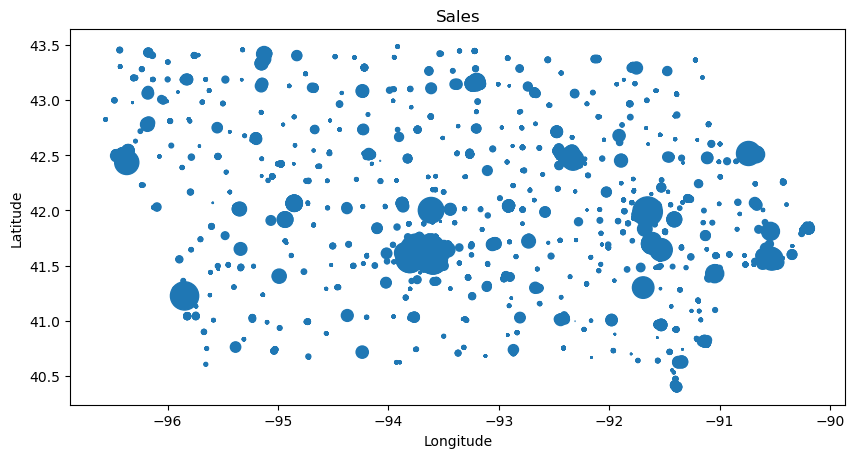

In [14]:
# Plot the data using the `scatter()` method and the `SALES` column for the color
ax = geo_data.plot(markersize=geo_data.Sales_USD / 500, figsize=(10, 10))

# Set the title and axis labels for the plot
ax.set_title('Sales')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [60]:
data

,store_number,address,city,zip_code,store_location,county_number,county,category,category_name,month,year,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,Sales_USD
0,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2017,6.855000,10.283333,252,2128.32,240.00,2591.400000
1,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2018,6.896154,10.345385,270,2402.10,268.50,2793.253846
2,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2019,6.199000,9.299000,240,2102.28,240.00,2231.760000
3,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2020,8.536667,12.806111,301,3321.63,240.75,3854.639444
4,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2021,11.257333,16.886667,168,2524.80,147.60,2836.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879342,9934,4860 HEATHERSTONE RD.,BETTENDORF,52722,POINT (-90.45500 41.57106),82,SCOTT,1011700,CORN WHISKIES,11,2017,19.250000,28.880000,1,346.56,0.75,28.880000
1879343,9937,3345 270TH AVE.,KEOKUK,52632,POINT (-91.39980 40.47324),56,LEE,1011700,CORN WHISKIES,5,2018,17.500000,26.250000,2,157.50,1.50,52.500000
1879344,9938,209 E 3RD ST,TEMPLETON,51463,POINT (-94.93637 41.91707),14,CARROLL,1011100,BLENDED WHISKIES,7,2018,27.410000,41.120000,49,246.72,36.75,2014.880000
1879345,9946,3294 170TH ST,ROCK RAPIDS,51246,POINT (-96.13860 43.40428),60,LYON,1700000,TEMPORARY & SPECIALTY PACKAGES,10,2020,15.000000,22.500000,120,2700.00,45.00,2700.000000


In [61]:
type(data.store_location.iloc[0])

shapely.geometry.point.Point

In [62]:
geo_data

,store_number,address,city,zip_code,store_location,county_number,county,category,category_name,month,year,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,Sales_USD
0,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2017,6.855000,10.283333,252,2128.32,240.00,2591.400000
1,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2018,6.896154,10.345385,270,2402.10,268.50,2793.253846
2,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2019,6.199000,9.299000,240,2102.28,240.00,2231.760000
3,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2020,8.536667,12.806111,301,3321.63,240.75,3854.639444
4,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2021,11.257333,16.886667,168,2524.80,147.60,2836.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879342,9934,4860 HEATHERSTONE RD.,BETTENDORF,52722,POINT (-90.45500 41.57106),82,SCOTT,1011700,CORN WHISKIES,11,2017,19.250000,28.880000,1,346.56,0.75,28.880000
1879343,9937,3345 270TH AVE.,KEOKUK,52632,POINT (-91.39980 40.47324),56,LEE,1011700,CORN WHISKIES,5,2018,17.500000,26.250000,2,157.50,1.50,52.500000
1879344,9938,209 E 3RD ST,TEMPLETON,51463,POINT (-94.93637 41.91707),14,CARROLL,1011100,BLENDED WHISKIES,7,2018,27.410000,41.120000,49,246.72,36.75,2014.880000
1879345,9946,3294 170TH ST,ROCK RAPIDS,51246,POINT (-96.13860 43.40428),60,LYON,1700000,TEMPORARY & SPECIALTY PACKAGES,10,2020,15.000000,22.500000,120,2700.00,45.00,2700.000000


In [63]:
# Camino de csv con long lat
alcohol_data = geo_data.copy()
alcohol_data['longitude'] =  geo_data.store_location.apply(lambda x : x.x)
alcohol_data['latitude'] = geo_data.store_location.apply(lambda x : x.y)

In [64]:
alcohol_data.drop(columns=['store_location'], inplace=True)

In [65]:
alcohol_data.category_name.value_counts().index

Index(['AMERICAN VODKAS', 'CANADIAN WHISKIES', 'WHISKEY LIQUEUR', 'SPICED RUM',
       'STRAIGHT BOURBON WHISKIES', 'TENNESSEE WHISKIES', 'BLENDED WHISKIES',
       'IMPORTED VODKAS', 'AMERICAN FLAVORED VODKA', 'WHITE RUM',
       'MIXTO TEQUILA', 'AMERICAN SCHNAPPS', 'AMERICAN BRANDIES',
       'FLAVORED RUM', 'IMPORTED CORDIALS & LIQUEURS',
       'AMERICAN CORDIALS & LIQUEUR', 'CREAM LIQUEURS', 'AMERICAN DRY GINS',
       '100% AGAVE TEQUILA', 'COCKTAILS /RTD', 'IMPORTED SCHNAPPS',
       'IRISH WHISKIES', 'IMPORTED BRANDIES', 'SCOTCH WHISKIES',
       'TEMPORARY & SPECIALTY PACKAGES', 'IMPORTED FLAVORED VODKA',
       'IMPORTED DRY GINS', 'STRAIGHT RYE WHISKIES', 'GOLD RUM',
       'COFFEE LIQUEURS', 'TRIPLE SEC', 'SINGLE MALT SCOTCH',
       'NEUTRAL GRAIN SPIRITS FLAVORED', 'NEUTRAL GRAIN SPIRITS',
       'AMERICAN DISTILLED SPIRIT SPECIALTY', 'AGED DARK RUM',
       'SINGLE BARREL BOURBON WHISKIES', 'SPECIAL ORDER ITEMS',
       'BOTTLED IN BOND BOURBON', 'TEMPORARY &  SPECIALTY

In [66]:
alcohol_data.category_name = alcohol_data.category_name.replace({'AMERICAN VODKAS' : 'VODKA', 'CANADIAN WHISKIES' : 'WHISKY', 'WHISKEY LIQUEUR' : 'WHISKY', 
       'SPICED RUM' : 'RUM', 'STRAIGHT BOURBON WHISKIES' : 'BOURBON', 'TENNESSEE WHISKIES' : 'WHISKY', 
       'BLENDED WHISKIES' :  'WHISKY', 'IMPORTED VODKAS' : 'IMP VODKA', 'AMERICAN FLAVORED VODKA' :'VODKA' , 
       'WHITE RUM' : 'RUM', 'MIXTO TEQUILA': 'TEQUILA', 'AMERICAN SCHNAPPS' : 'SCHNAPPS', 
       'AMERICAN BRANDIES' : 'BRANDY', 'FLAVORED RUM' : 'RUM', 'IMPORTED CORDIALS & LIQUEURS' : 'IMP LIQUEURS',
       'AMERICAN CORDIALS & LIQUEUR': 'LIQUEURS', 'CREAM LIQUEURS' : 'LIQUEURS', 'AMERICAN DRY GINS': 'GIN',
       '100% AGAVE TEQUILA' : 'TEQUILA', 'COCKTAILS /RTD': 'COCKTAILS', 'IRISH WHISKIES': 'IMP WHISKY',
       'IMPORTED BRANDIES': 'IMP BRANDY', 'SCOTCH WHISKIES': 'IMP WHISKY', 'TEMPORARY & SPECIALTY PACKAGES' : 'SPECIALTY PCKG', 
       'IMPORTED FLAVORED VODKA' : 'IMP VODKA', 'IMPORTED DRY GINS': 'IMP GIN', 'STRAIGHT RYE WHISKIES' : 'WHISKY', 
       'GOLD RUM' : 'RUM', 'SINGLE MALT SCOTCH' : 'WHISKY', 'NEUTRAL GRAIN SPIRITS FLAVORED' : 'SPIRIT', 
       'NEUTRAL GRAIN SPIRITS' : 'SPIRIT', 'AMERICAN DISTILLED SPIRIT SPECIALTY' : 'SPIRIT' , 
       'AGED DARK RUM':'RUM', 'SINGLE BARREL BOURBON WHISKIES' : 'BOURBON', 'SPECIAL ORDER ITEMS' : 'SPECIAL ITEM',
       'BOTTLED IN BOND BOURBON' : 'BOURBON', 'TEMPORARY &  SPECIALTY PACKAGES' : 'SPECIALTY PCKG',
       'FLAVORED GIN' : 'GIN', 'IMPORTED DISTILLED SPIRIT SPECIALTY' : 'SPIRIT', 'CORN WHISKIES' : 'WHISKY',
       'IMPORTED CORDIALS & LIQUEUR' : 'IMP LIQUEURS', 'AMERICAN SLOE GINS' : 'GIN',
       'IOWA DISTILLERIES': 'LOCAL DIST', 'AMERICAN CORDIALS & LIQUEURS': 'LIQUEURS', 'AMERICAN VODKA' : 'VODKA',
       'DISTILLED SPIRITS SPECIALTY' : 'SPIRIT', 'AMERICAN DISTILLED SPIRITS SPECIALTY' : 'SPIRIT',
       'COCKTAILS / RTD': 'COCKTAILS', 'IMPORTED DISTILLED SPIRITS SPECIALTY': 'IMP SPIRIT',
       'IMPORTED VODKA' : 'IMP VODKA', 'IOWA DISTILLERY WHISKIES' : 'LOCAL WHISKY',
       'TEMPORARY  & SPECIALTY PACKAGES' : 'SPECIALTY PCKG', 'HOLIDAY VAP' :  'SPECIAL ITEM', 'IMPORTED GINS' : 'IMP GIN',
       'IMPORTED WHISKIES': 'IMP WHISKY', 'AMERICAN WHISKIES' : 'WHISKY',
       'DELISTED / SPECIAL ORDER ITEMS' : 'SPECIAL ITEM'})

In [67]:
alcohol_data.category_name.value_counts()

WHISKY               381845
RUM                  250606
VODKA                162715
TEQUILA              114789
IMP VODKA            106914
LIQUEURS             106611
BOURBON               97556
IMP WHISKY            83883
GIN                   60671
IMP LIQUEURS          59262
SCHNAPPS              59047
BRANDY                57933
SPIRIT                55328
COCKTAILS             48868
SPECIALTY PCKG        45378
IMPORTED SCHNAPPS     45218
IMP BRANDY            44869
IMP GIN               32926
COFFEE LIQUEURS       28708
TRIPLE SEC            19416
SPECIAL ITEM           9451
MEZCAL                 4248
LOCAL DIST             1679
IMP SPIRIT              101
LOCAL WHISKY             70
Name: category_name, dtype: int64

In [68]:
alcohol_data.to_csv('alcohol_data.csv')

In [177]:
alcohol_data.category_name.value_counts().index

Index(['WHISKY', 'RUM', 'TEQUILA', 'BOURBON', 'VODKA', 'TENNESSEE WHISKY',
       'IMP VODKA', 'FLAVOR VODKA', 'SCHNAPPS', 'BRANDY', 'IMPORT CORDIALS',
       'GIN', 'CORDIALS', 'CREAM LIQUEUR', 'COCKTAILS', 'SPECIALTY PCKG',
       'IMPORTED SCHNAPPS', 'IRISH WHISKY', 'IMPORTED BRANDY', 'SCOTCH WHISKY',
       'IMP FLAVOR VODKA', 'IMP GIN', 'RYE WHISKY', 'COFFEE LIQUEURS',
       'TRIPLE SEC', 'SINGLE MALT', 'FLAVOR SPIRIT', 'GRAIN SPIRIT',
       'SPIRIT SPECIALTY', 'SPECIAL ITEM', 'FLAVOR GIN', 'SPIRIT',
       'IMP CORDIALS', 'MEZCAL', 'LOCAL DIST', 'SPIRITS SPECIAL',
       'IMP SPIRITS SPECIAL', 'LOCAL WHISKY', 'IMP WHISKY'],
      dtype='object')

## Draft, from here onwards

In [ ]:
sample = geo_data.iloc[:10, :]
sample

In [36]:
# import geopandas as gpd

# # Convert Point column to WKT format
sample.rename(columns={'store_location':'geometry'}, inplace=True)
# geo_data['geometry'] = geo_data['geometry'].apply(lambda x: x.wkt)

/var/folders/yv/9jkc42cj01gb_08dbbq9fcnw0000gn/T/ipykernel_47086/2775061978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.rename(columns={'store_location':'geometry'}, inplace=True)


In [37]:
sample

,store_number,address,city,zip_code,geometry,county_number,county,category,category_name,month,year,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,Sales_USD
0,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2017,6.855000,10.283333,252,2128.32,240.00,2591.400000
1,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2018,6.896154,10.345385,270,2402.10,268.50,2793.253846
2,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2019,6.199000,9.299000,240,2102.28,240.00,2231.760000
3,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2020,8.536667,12.806111,301,3321.63,240.75,3854.639444
4,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2021,11.257333,16.886667,168,2524.80,147.60,2836.960000
5,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,1,2022,9.892727,14.840909,118,1751.70,103.70,1751.227273
6,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,2,2017,6.296667,9.446000,271,2204.58,260.00,2559.866000
7,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,2,2018,10.658000,15.988000,242,2339.52,238.50,3869.096000
8,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,2,2019,7.463333,11.195833,210,2017.26,199.50,2351.125000
9,2106,2217 COLLEGE,CEDAR FALLS,50613,POINT (-92.45580 42.51718),7,BLACK HAWK,1011100,BLENDED WHISKIES,2,2020,9.631333,14.447333,264,3437.52,246.00,3814.096000


In [ ]:
# Should I export as one shapefile per year, or just one huge shapefile?

In [ ]:
# Export geodata as a shapefile!